In [478]:
import pandas as pd
import numpy as np

In [479]:
df=pd.read_csv('E:\\Desktop\\SLIIT\\colombo_rh_2012-2018.csv',parse_dates=True)

print('Shape of data',df.shape)
print ('\nNull values in data :\n',df.isnull().sum())
df.head()

Shape of data (4403, 7)

Null values in data :
 station_id       0
station_name     0
element_name     0
year             0
month            0
day              0
obs_val         20
dtype: int64


,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [480]:
null_rows = df[df.isnull().any(axis=1)]

print(null_rows)

      station_id station_name element_name  year  month  day  obs_val
60         43466      COLOMBO        RHMAX  2012      2   30      NaN
61         43466      COLOMBO        RHMAX  2012      2   31      NaN
123        43466      COLOMBO        RHMAX  2012      4   31      NaN
185        43466      COLOMBO        RHMAX  2012      6   31      NaN
278        43466      COLOMBO        RHMAX  2012      9   31      NaN
340        43466      COLOMBO        RHMAX  2012     11   31      NaN
431        43466      COLOMBO        RHMAX  2013      2   29      NaN
432        43466      COLOMBO        RHMAX  2013      2   30      NaN
433        43466      COLOMBO        RHMAX  2013      2   31      NaN
495        43466      COLOMBO        RHMAX  2013      4   31      NaN
557        43466      COLOMBO        RHMAX  2013      6   31      NaN
650        43466      COLOMBO        RHMAX  2013      9   31      NaN
712        43466      COLOMBO        RHMAX  2013     11   31      NaN
803        43466    

In [481]:
df=df.dropna()
print('Shape of data',df.shape)
print ('\nNull values in data\n',df.isnull().sum())
df.head()

Shape of data (4383, 7)

Null values in data
 station_id      0
station_name    0
element_name    0
year            0
month           0
day             0
obs_val         0
dtype: int64


,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [482]:
#finding the unique values present
print(df['element_name'].unique())
print(df['year'].unique())

['RHMAX' 'RHMIN']
[2012 2013 2014 2015 2016 2017 2018]


In [483]:
#max relative hmidity is recorded for years 2012-2018
df[df['element_name'] == 'RHMAX']['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [484]:
#but min relative hmidity is recorded only for years 2015-2018
df[df['element_name'] == 'RHMIN']['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [485]:
#making the date column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,station_id,station_name,element_name,year,month,day,obs_val,date
0,43466,COLOMBO,RHMAX,2012,1,1,91.0,2012-01-01
1,43466,COLOMBO,RHMAX,2012,1,2,90.0,2012-01-02
2,43466,COLOMBO,RHMAX,2012,1,3,89.0,2012-01-03
3,43466,COLOMBO,RHMAX,2012,1,4,89.0,2012-01-04
4,43466,COLOMBO,RHMAX,2012,1,5,95.0,2012-01-05


In [486]:
df1 = df.drop(['station_id', 'station_name','year', 'month', 'day'], axis=1)
df1 = df1.set_index('date')
df1.head()

,element_name,obs_val
date,,
2012-01-01,RHMAX,91.0
2012-01-02,RHMAX,90.0
2012-01-03,RHMAX,89.0
2012-01-04,RHMAX,89.0
2012-01-05,RHMAX,95.0


In [769]:
def get_avg_relhum(df, idx):
   
    rhmin_mean = df.loc[df['element_name'] == 'RHMIN', 'obs_val'].mean()
    rhmin_mean=round(rhmin_mean,2)
    # Get the values in the 'rhmax' and 'rhmin' columns for the given index
    rhmax = df.loc[(df.index == idx) & (df['element_name'] == 'RHMAX'), 'obs_val']
    rhmin = df.loc[(df.index == idx) & (df['element_name'] == 'RHMIN'), 'obs_val']
    
    # If both 'rhmax' and 'rhmin' values are present, calculate the average
    if not rhmax.empty and not rhmin.empty:
        avg_rh = (rhmax.iloc[0] + rhmin.iloc[0]) / 2.0
        avg_rh = round(avg_rh, 2)
    # Otherwise, use the 'rhmin' mean value and get the average
    else:
        avg_rh=(rhmax.iloc[0] + rhmin_mean) / 2.0
        avg_rh = round(avg_rh, 2)
    
    return avg_rh

In [770]:
get_avg_relhum(df1,'2015-01-01') #testing 

85.0

In [771]:
get_avg_relhum(df1,'2012-01-01') #testing 

82.6

In [772]:
#testing 
rhmax_mean = df1.loc[df1['element_name'] == 'RHMAX', 'obs_val'].mean()
rhmax_mean 

86.83299110198494

In [773]:
rhmin_mean = df.loc[df['element_name'] == 'RHMIN', 'obs_val'].mean()
rhmin_mean

74.19370294318959

In [774]:
(74.19370294318959 + 91 )/2 #function is working

82.59685147159479

In [775]:
#apply function to the df
df1['avg_rh'] = df1.index.map(lambda x: get_avg_relhum(df1, x))
df1

,element_name,obs_val,avg_rh
date,,,
2012-01-01,RHMAX,91.0,82.6
2012-01-02,RHMAX,90.0,82.1
2012-01-03,RHMAX,89.0,81.6
2012-01-04,RHMAX,89.0,81.6
2012-01-05,RHMAX,95.0,84.6
...,...,...,...
2018-12-27,RHMAX,90.0,83.0
2018-12-28,RHMAX,88.0,80.5
2018-12-29,RHMAX,76.0,72.0


In [776]:
#as you can see both max and min RH has the same average RH 2015-11-3
df1.loc['2015-11-3']


,element_name,obs_val,avg_rh
date,,,
2015-11-03,RHMAX,94.0,86.5
2015-11-03,RHMIN,79.0,86.5


In [777]:
df1.loc['2012-01-01']

element_name    RHMAX
obs_val          91.0
avg_rh           82.6
Name: 2012-01-01 00:00:00, dtype: object

In [778]:
#function to check if a particular year has duplicates
def check_duplicate_index(df):
    years = range(2012, 2019)
    for year in years:
        year_df = df[df.index.year == year]
        if year_df.index.duplicated().any():
            print(f"Duplicate index found for year {year}")

In [779]:
check_duplicate_index(df1)

Duplicate index found for year 2015
Duplicate index found for year 2016
Duplicate index found for year 2017
Duplicate index found for year 2018


In [780]:
print('Shape of data',df1.shape)
df1.loc['2018-12-31'] #year 2018 has been repeated again

Shape of data (4383, 3)


,element_name,obs_val,avg_rh
date,,,
2018-12-31,RHMAX,82.0,74.5
2018-12-31,RHMIN,67.0,74.5
2018-12-31,RHMAX,82.0,74.5


In [781]:
# Reset the index to a sequential integer index
df2 = df1.reset_index(drop=False)
print('Shape of data',df2.shape)
df2.head()


Shape of data (4383, 4)


,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,82.6
1,2012-01-02,RHMAX,90.0,82.1
2,2012-01-03,RHMAX,89.0,81.6
3,2012-01-04,RHMAX,89.0,81.6
4,2012-01-05,RHMAX,95.0,84.6


In [782]:
 df2.loc[df2['date'] == '2018-12-31'] #getting the index to delete duplicated rows

,date,element_name,obs_val,avg_rh
2921,2018-12-31,RHMAX,82.0,74.5
4017,2018-12-31,RHMIN,67.0,74.5
4382,2018-12-31,RHMAX,82.0,74.5


In [783]:
#removing duplicated rows
df3 = df2.loc[0:2921]
print('Shape of data',df3.shape)
df3.loc[df3['date'] == '2018-12-31']

Shape of data (2922, 4)


,date,element_name,obs_val,avg_rh
2921,2018-12-31,RHMAX,82.0,74.5


In [784]:
df3

,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,82.6
1,2012-01-02,RHMAX,90.0,82.1
2,2012-01-03,RHMAX,89.0,81.6
3,2012-01-04,RHMAX,89.0,81.6
4,2012-01-05,RHMAX,95.0,84.6
...,...,...,...,...
2917,2018-12-27,RHMAX,90.0,83.0
2918,2018-12-28,RHMAX,88.0,80.5
2919,2018-12-29,RHMAX,76.0,72.0
2920,2018-12-30,RHMAX,81.0,68.0


In [785]:
#total number of days between 2012-2018= 2557, but we have 2922 rows here
df3.loc[df3['date'] == '2015-01-01'] #year 2015 

,date,element_name,obs_val,avg_rh
1096,2015-01-01,RHMAX,94.0,85.0
1461,2015-01-01,RHMIN,76.0,85.0


In [786]:
#removing duplicated year 2015, we only need to remove the rows with value 'RHMIN' for element_name colmn
count = df3['element_name'].value_counts()['RHMIN'] #getting the count to make sure only 2015 year has 'RHMIN'
count

365

In [787]:
#removing those rows
df3 = df3[df3['element_name'] != 'RHMIN']
df3

,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,82.6
1,2012-01-02,RHMAX,90.0,82.1
2,2012-01-03,RHMAX,89.0,81.6
3,2012-01-04,RHMAX,89.0,81.6
4,2012-01-05,RHMAX,95.0,84.6
...,...,...,...,...
2917,2018-12-27,RHMAX,90.0,83.0
2918,2018-12-28,RHMAX,88.0,80.5
2919,2018-12-29,RHMAX,76.0,72.0
2920,2018-12-30,RHMAX,81.0,68.0


In [788]:
df3 = df3.reset_index(drop=True)
df3

,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,82.6
1,2012-01-02,RHMAX,90.0,82.1
2,2012-01-03,RHMAX,89.0,81.6
3,2012-01-04,RHMAX,89.0,81.6
4,2012-01-05,RHMAX,95.0,84.6
...,...,...,...,...
2552,2018-12-27,RHMAX,90.0,83.0
2553,2018-12-28,RHMAX,88.0,80.5
2554,2018-12-29,RHMAX,76.0,72.0
2555,2018-12-30,RHMAX,81.0,68.0


In [789]:
df3.loc[df3['date'] == '2015-01-01']

,date,element_name,obs_val,avg_rh
1096,2015-01-01,RHMAX,94.0,85.0


In [790]:
df3 = df3.set_index('date')
columns_to_drop = ['element_name', 'obs_val']  # list of column names to drop
df4 = df3.drop(columns=columns_to_drop) 
df4

,avg_rh
date,
2012-01-01,82.6
2012-01-02,82.1
2012-01-03,81.6
2012-01-04,81.6
2012-01-05,84.6
...,...
2018-12-27,83.0
2018-12-28,80.5
2018-12-29,72.0


In [791]:
df4['log_data']= np.log(df4['avg_rh'])
df4.head()

,avg_rh,log_data
date,,
2012-01-01,82.6,4.414010
2012-01-02,82.1,4.407938
2012-01-03,81.6,4.401829
2012-01-04,81.6,4.401829
2012-01-05,84.6,4.437934


# plot your data

<AxesSubplot:xlabel='date'>

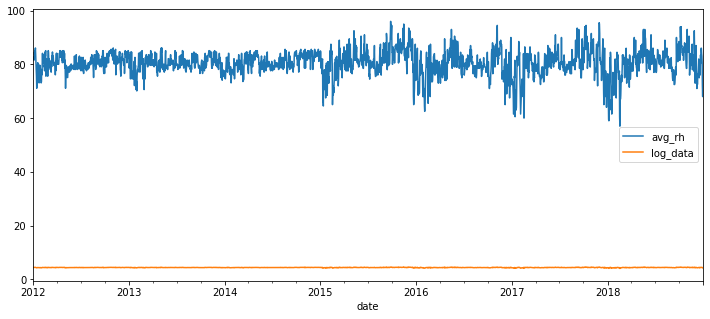

In [792]:
#checking if data is stationary? const mean, const var, no seasonality; seems almost stationary
df4.plot(figsize=(12,5))


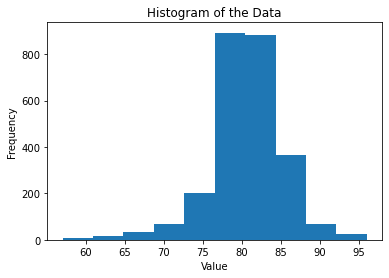

In [793]:
# Checking if data normally distributed
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot the histogram of the data.
ax.hist(df4['avg_rh'])

# Set the title and labels of the plot.
ax.set_title('Histogram of the Data')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Show the plot.
plt.show()

In [794]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test.
stat, p = shapiro(df4['avg_rh'])

# Print the p-value.
print(p)
if p < 0.05: print('data is not normally distributed')
else: print('data normally distributed')

3.9661911021418667e-26
data is not normally distributed


# Check For Stationarity using ADF test

In [795]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [796]:
check_stationarity(df4['avg_rh'])
#pvalue < 0.05, therefore data is stationary

The series is stationary


# Check For Stationarity using KPSS test

In [797]:
from statsmodels.tsa.stattools import kpss

kpss_stat, p_value, lags, critical_values = kpss(df4['log_data'], nlags='auto')

# Print test results
print(f'KPSS test statistic: {kpss_stat:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Lags used: {lags}')
print('Critical values:')
for key, value in critical_values.items():
    print(f'   {key}: {value:.4f}')
if p_value <= 0.05:
    print ("data not stationary")
else:
    print ("data is stationary")


KPSS test statistic: 0.0858
p-value: 0.1000
Lags used: 26
Critical values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
data is stationary


E:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [798]:
import statsmodels.stats.stattools as st

# Perform the Durbin-Watson test to check if there's seasoality
dw = st.durbin_watson(df4['avg_rh'])

# Print the results of the test.
print('Durbin-Watson test:', dw)

Durbin-Watson test: 0.001891940779220712


strong positive auto correlation [close to zero] indicating that there is seasonal patterns in the data

E:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


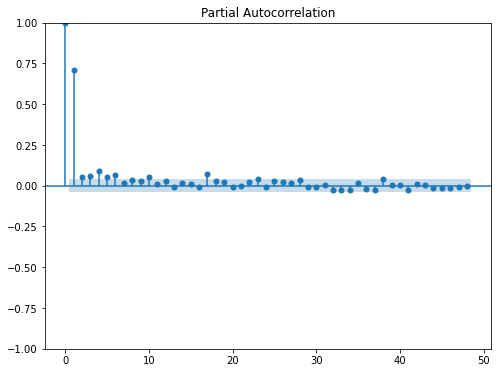

In [799]:
import statsmodels.graphics.tsaplots as tsa_plots
fig = plt.figure(figsize=(8, 6))

# Plot the PACF for seasonally diff data
tsa_plots.plot_pacf(df4['avg_rh'], lags=48, ax=plt.gca())
# Show the plot
plt.show()
# # Plot the ACF.
# tsa_plots.plot_acf(df4['avg_rh'])
# # Plot the PACF.
# tsa_plots.plot_pacf(df4['avg_rh'])

p=1

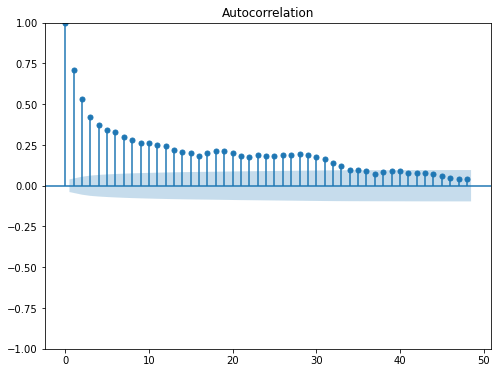

In [800]:
fig = plt.figure(figsize=(8, 6))

# Plot the PACF for seasonally diff data
tsa_plots.plot_acf(df4['avg_rh'], lags=48, ax=plt.gca())
# Show the plot
plt.show()

q= 0

In [801]:
from statsmodels.tsa.statespace.tools import diff 
#differentiating by seasonal periods
diffdvds=diff(df4, k_diff=0, k_seasonal_diff=True, seasonal_periods=12)
diffdvds

,avg_rh,log_data
date,,
2012-01-13,-7.0,-0.088553
2012-01-14,-11.0,-0.143851
2012-01-15,-7.5,-0.096414
2012-01-16,-5.5,-0.069781
2012-01-17,-5.0,-0.060920
...,...,...
2018-12-27,1.0,0.012121
2018-12-28,0.0,0.000000
2018-12-29,-3.0,-0.040822


In [802]:
df4

,avg_rh,log_data
date,,
2012-01-01,82.6,4.414010
2012-01-02,82.1,4.407938
2012-01-03,81.6,4.401829
2012-01-04,81.6,4.401829
2012-01-05,84.6,4.437934
...,...,...
2018-12-27,83.0,4.418841
2018-12-28,80.5,4.388257
2018-12-29,72.0,4.276666


E:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


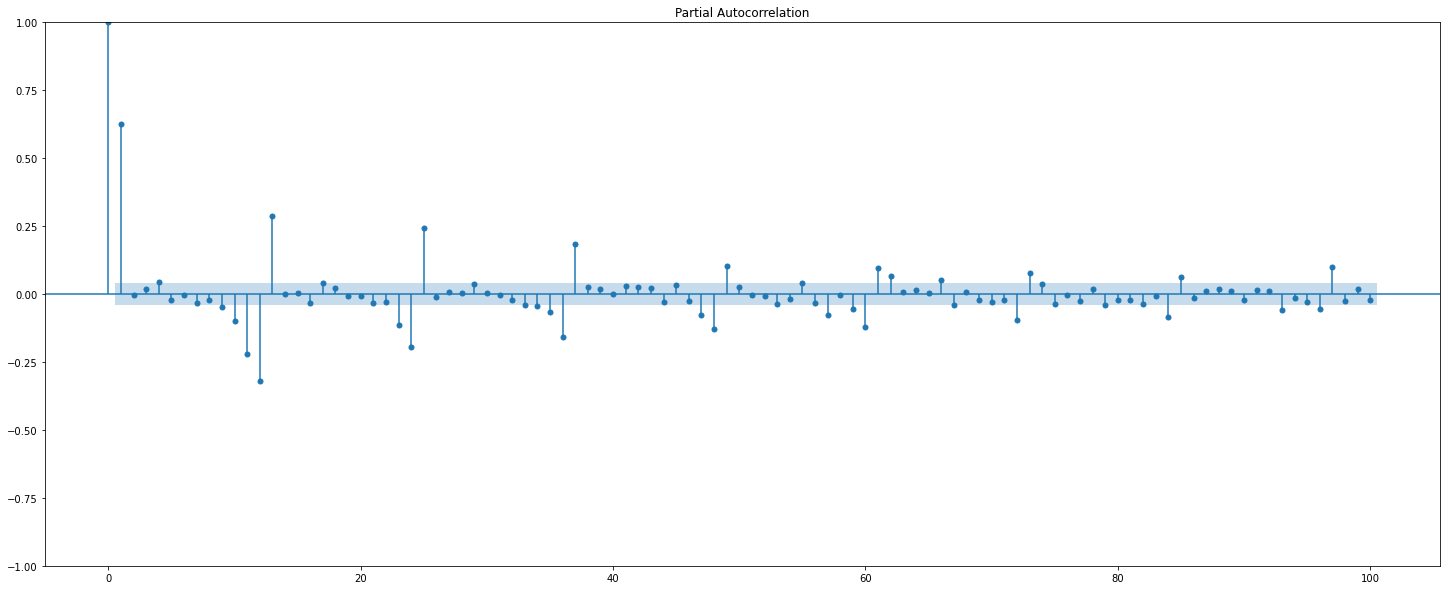

In [803]:
import statsmodels.api as sm
# Create a figure and set the figure size
fig = plt.figure(figsize=(25, 10))

# Plot the PACF for seasonally diff data
sm.graphics.tsa.plot_pacf(diffdvds['avg_rh'], lags=100, ax=plt.gca())

# Show the plot
plt.show()

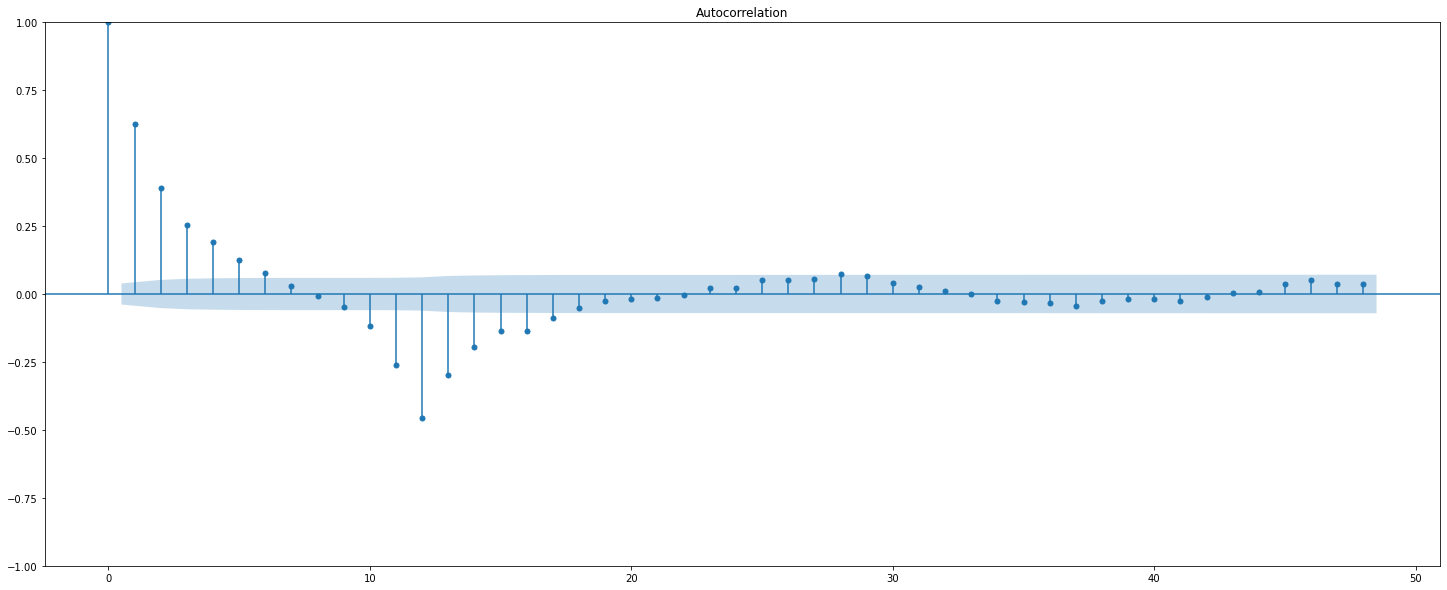

In [804]:
fig = plt.figure(figsize=(25, 10))
# Plot the PACF for seasonally diff data
sm.graphics.tsa.plot_acf(diffdvds['avg_rh'], lags=48, ax=plt.gca())
plt.show()

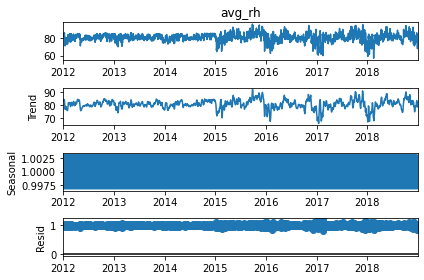

In [805]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df4['avg_rh'], model='multiplicative',extrapolate_trend='freq')
result.plot()
plt.show()

seasona plot filled, indicating no seasonality

In [806]:
from pmdarima.arima import auto_arima

# apply auto_arima
model = auto_arima(df4['avg_rh'], trace=True, suppress_warnings=True, stepwise=False, error_action='ignore')

# print the model summary
print(model.summary())


 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=15066.951, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=13927.795, Time=0.54 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=13550.234, Time=0.88 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=13435.861, Time=1.49 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=13372.492, Time=1.96 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=13352.367, Time=2.11 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=13280.645, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=13272.778, Time=2.16 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=13255.748, Time=3.71 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=13229.300, Time=4.51 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=13226.850, Time=5.97 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=13274.525, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=13263.155, Time=3.66 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=13264.972, Time=1.92 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=13238.728, Time=5.75

# splitting to training and testing data

In [807]:
train=df4.iloc[:-30]
test=df4.iloc[-30:]
#from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# train, test = train_test_split(df4, test_size=0.2, shuffle=True, random_state=42)
# split data into train and test sets
# train = df4.sample(frac=0.8, random_state=42)
# test = df4.drop(train.index)

print(train.shape,test.shape)
print("train ==>",train.iloc[0],"\n",train.iloc[-1])
print("test ==>",test.iloc[0],"\n",test.iloc[-1])

(2527, 2) (30, 2)
train ==> avg_rh      82.60000
log_data     4.41401
Name: 2012-01-01 00:00:00, dtype: float64 
 avg_rh      73.000000
log_data     4.290459
Name: 2018-12-01 00:00:00, dtype: float64
test ==> avg_rh      73.000000
log_data     4.290459
Name: 2018-12-02 00:00:00, dtype: float64 
 avg_rh      74.500000
log_data     4.310799
Name: 2018-12-31 00:00:00, dtype: float64


# training the model

In [808]:
# import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
train.index.freq = 'D'

# Fit SARIMAX model to data
model = ARIMA(train['avg_rh'], order=(1, 0, 4))
res = model.fit()
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                 avg_rh   No. Observations:                 2527
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -6518.067
Date:                Sat, 06 May 2023   AIC                          13050.134
Time:                        12:41:18   BIC                          13090.977
Sample:                    01-01-2012   HQIC                         13064.954
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.5413      0.412    195.525      0.000      79.734      81.349
ar.L1          0.9505      0.009    100.252      0.000       0.932       0.969
ma.L1         -0.3095      0.018    -17.519      0.0

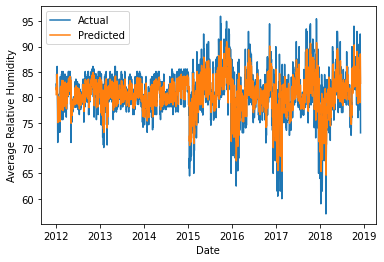

In [809]:
# Make predictions on the training set
train_pred = res.predict(start=0, end=len(train)-1)

# Plot actual and predicted values
plt.plot(train['avg_rh'],  label='Actual')
plt.plot(train_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Average Relative Humidity')
plt.legend()
plt.show()


# making predictions for testing set

In [810]:
start=len(train)
end=len(train)+len(test)-1
# make predictions on test data

pred=round(res.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions'),2)
pred

2018-12-02    76.25
2018-12-03    78.49
2018-12-04    79.94
2018-12-05    80.45
2018-12-06    80.46
2018-12-07    80.46
2018-12-08    80.47
2018-12-09    80.47
2018-12-10    80.47
2018-12-11    80.48
2018-12-12    80.48
2018-12-13    80.48
2018-12-14    80.49
2018-12-15    80.49
2018-12-16    80.49
2018-12-17    80.49
2018-12-18    80.50
2018-12-19    80.50
2018-12-20    80.50
2018-12-21    80.50
2018-12-22    80.50
2018-12-23    80.51
2018-12-24    80.51
2018-12-25    80.51
2018-12-26    80.51
2018-12-27    80.51
2018-12-28    80.51
2018-12-29    80.52
2018-12-30    80.52
2018-12-31    80.52
Freq: D, Name: ARIMA Predictions, dtype: float64

<AxesSubplot:xlabel='date'>

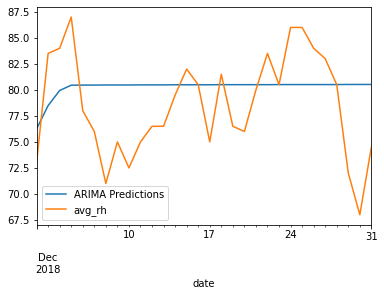

In [811]:

import matplotlib.pyplot as plt
pred.plot(legend=True)
test['avg_rh'].plot(legend=True)



In [812]:
from statsmodels.tools.eval_measures import rmse
nrmse_seasonal = rmse(pred, test['avg_rh'])/(np.max(test['avg_rh'])-np.min(test['avg_rh']))
print('normalized rmse ',nrmse_seasonal)

normalized rmse  0.2700788161697895


# Evaluation through model statistics

In [814]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt
testMean= test['avg_rh'].mean()
print(round(testMean,4))
rmse=sqrt(mean_squared_error(pred,test['avg_rh']))
print("Root meaan squared error ", round(rmse,4))
mae = mean_absolute_error(test['avg_rh'], pred)
print("meaan absolute error ", round(mae,4))

print('average error :', round(rmse/ testMean * 100,4), '%')
mask = np.isfinite(test['avg_rh']) & np.isfinite(pred)
MAPE = np.mean(np.abs((test['avg_rh'][mask] - pred[mask]) / (test['avg_rh'][mask] + epsilon))) * 100
nan_values = np.isnan(MAPE)
print('MAPE:', round(MAPE,4), '%')

78.5667
Root meaan squared error  5.1315
meaan absolute error  4.2393
average error : 6.5314 %
MAPE: 5.5486 %


In [815]:
model = ARIMA(train['avg_rh'], order=(1, 0, 0))
res = model.fit()
start=len(train)
end=len(train)+len(test)-1
# make predictions on test data

pred=round(res.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions'),2)
rmse=sqrt(mean_squared_error(pred,test['avg_rh']))
print("Root meaan squared error ", round(rmse,4))
mae = mean_absolute_error(test['avg_rh'], pred)
print("meaan absolute error ", round(mae,4))

print('average error :', round(rmse/ testMean * 100,4), '%')
mask = np.isfinite(test['avg_rh']) & np.isfinite(pred)
MAPE = np.mean(np.abs((test['avg_rh'][mask] - pred[mask]) / (test['avg_rh'][mask] + epsilon))) * 100
nan_values = np.isnan(MAPE)
print('MAPE:', round(MAPE,4), '%')

Root meaan squared error  5.2219
meaan absolute error  4.263
average error : 6.6464 %
MAPE: 5.551 %


best arima order = (1,0,4) 
# training for entire dataset

In [816]:
model = ARIMA(df4['avg_rh'], order=(1, 0, 4))
res = model.fit()
print(res.summary())

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 avg_rh   No. Observations:                 2557
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -6604.212
Date:                Sat, 06 May 2023   AIC                          13222.424
Time:                        12:47:32   BIC                          13263.350
Sample:                    01-01-2012   HQIC                         13237.265
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.5044      0.410    196.491      0.000      79.701      81.307
ar.L1          0.9513      0.009    100.981      0.000       0.933       0.970
ma.L1         -0.3080      0.018    -17.460      0.0

# making predictions for past and future average rh

In [817]:
from datetime import datetime

def predict_rh(res):

  # Get the current date.
  current_date = datetime.now()

  # Get the start date and end date of the past 12 months.
  past_start_date = current_date - pd.Timedelta(days=365)
  past_end_date = current_date - pd.Timedelta(days=1)

  # Get the start date and end date of the future 12 months.
  future_start_date = current_date + pd.Timedelta(days=1)
  future_end_date = current_date + pd.Timedelta(days=366)

  # Predict the past 12 months rh values.
  past_rh_values = res.predict(start=past_start_date, end=past_end_date)

  # Predict the future 12 months rh values.
  future_rh_values = res.predict(start=future_start_date, end=future_end_date)

  # Return the past 12 months rh values and future 12 months rh values.
  return past_rh_values, future_rh_values


In [818]:
pastRH,futureRH = predict_rh(res)

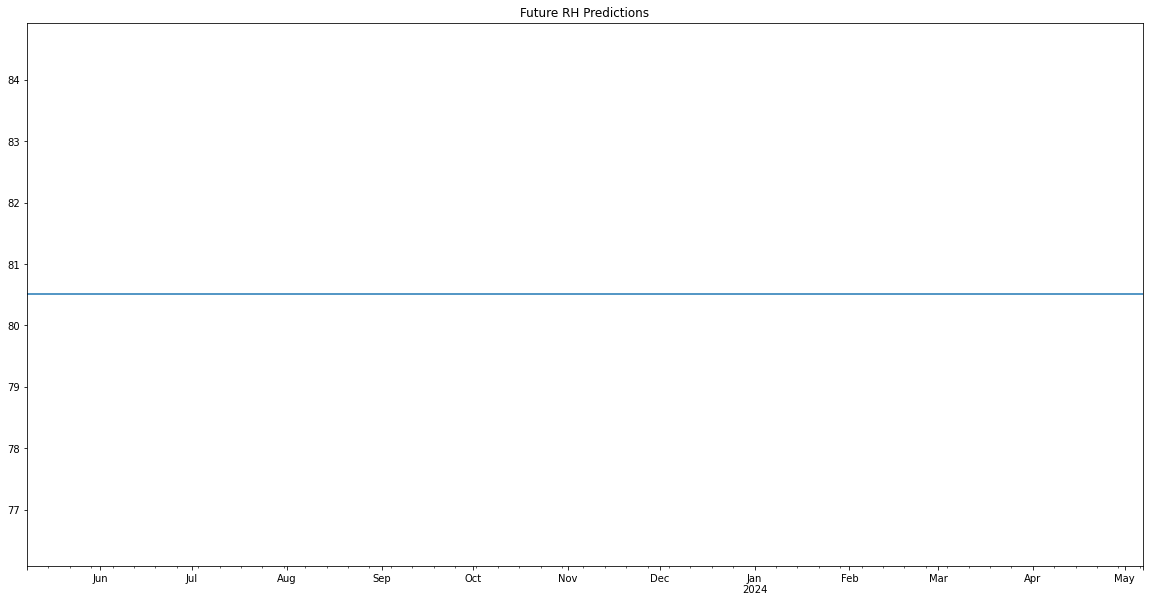

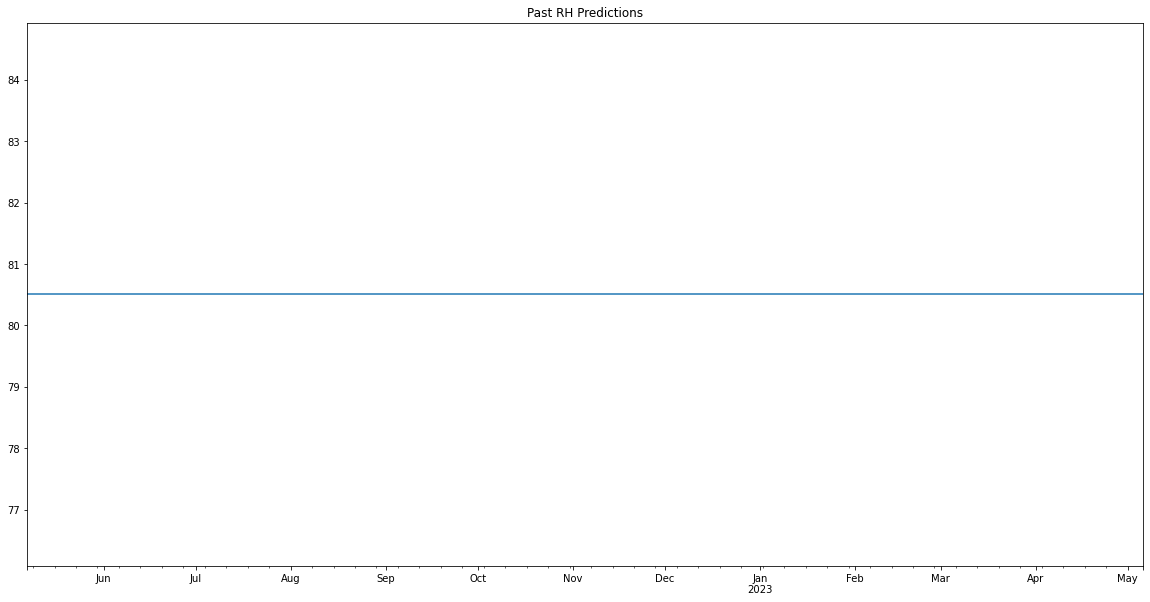

In [820]:
# Plot the future predictions
fig, ax = plt.subplots(figsize=(20, 10))
futureRH.plot(ax=ax)
ax.set_title('Future RH Predictions')

# Plot the past predictions
fig, ax = plt.subplots(figsize=(20, 10))
pastRH.plot(ax=ax)
ax.set_title('Past RH Predictions')

plt.show()

In [821]:
futureRH

2023-05-08    80.504413
2023-05-09    80.504413
2023-05-10    80.504413
2023-05-11    80.504413
2023-05-12    80.504413
                ...    
2024-05-03    80.504413
2024-05-04    80.504413
2024-05-05    80.504413
2024-05-06    80.504413
2024-05-07    80.504413
Freq: D, Name: predicted_mean, Length: 366, dtype: float64

In [822]:
pastRH

2022-05-07    80.504413
2022-05-08    80.504413
2022-05-09    80.504413
2022-05-10    80.504413
2022-05-11    80.504413
                ...    
2023-05-02    80.504413
2023-05-03    80.504413
2023-05-04    80.504413
2023-05-05    80.504413
2023-05-06    80.504413
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

In [823]:
import pickle

# assume that your trained model object is named 'model'
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(res, f)